In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_text
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Titanic-Dataset - Titanic-Dataset.csv')

In [19]:
# Check missing values
missing_percent = df.isnull().mean() * 100
print("Missing Values Percentage:\n", missing_percent)

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
# We can see that these are not relevant to our finding so we can remove them(no use in building tree)

Missing Values Percentage:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [20]:
# Handle missing values
# Here if the missing values in a coumn are less than 10percent then we will remove them else we will replace by median
for col in df.columns:
    if missing_percent[col] < 10:
        df.dropna(subset=[col], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Convert categorical columns to numerical
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

/tmp/ipykernel_342269/1804838599.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [21]:
# Split dataset into features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split into training (78%) and testing (22%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [22]:
# Train ID3 decision tree classifier
# entropy is used as the criterion for ID3
# highest information gain attribute is selected for splitting at every step
# formula for information gain is: Gain(S, A) = Entropy(S) - ∑( |Sv| / |S| ) * Entropy(Sv)
# formula for Entropy(S) is: Entropy(S) = - ∑( p(x) * log2(p(x)) ), p(x) is the probability of class x
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 uses entropy
tree_model = clf.fit(X_train, y_train)

In [23]:
# Predict on test data
y_pred = tree_model.predict(X_test)

In [24]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print('Classification Report:\n', report)

Accuracy: 0.7551
Precision: 0.7621
Recall: 0.7551
F1-Score: 0.7573
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       123
           1       0.65      0.73      0.69        73

    accuracy                           0.76       196
   macro avg       0.74      0.75      0.74       196
weighted avg       0.76      0.76      0.76       196



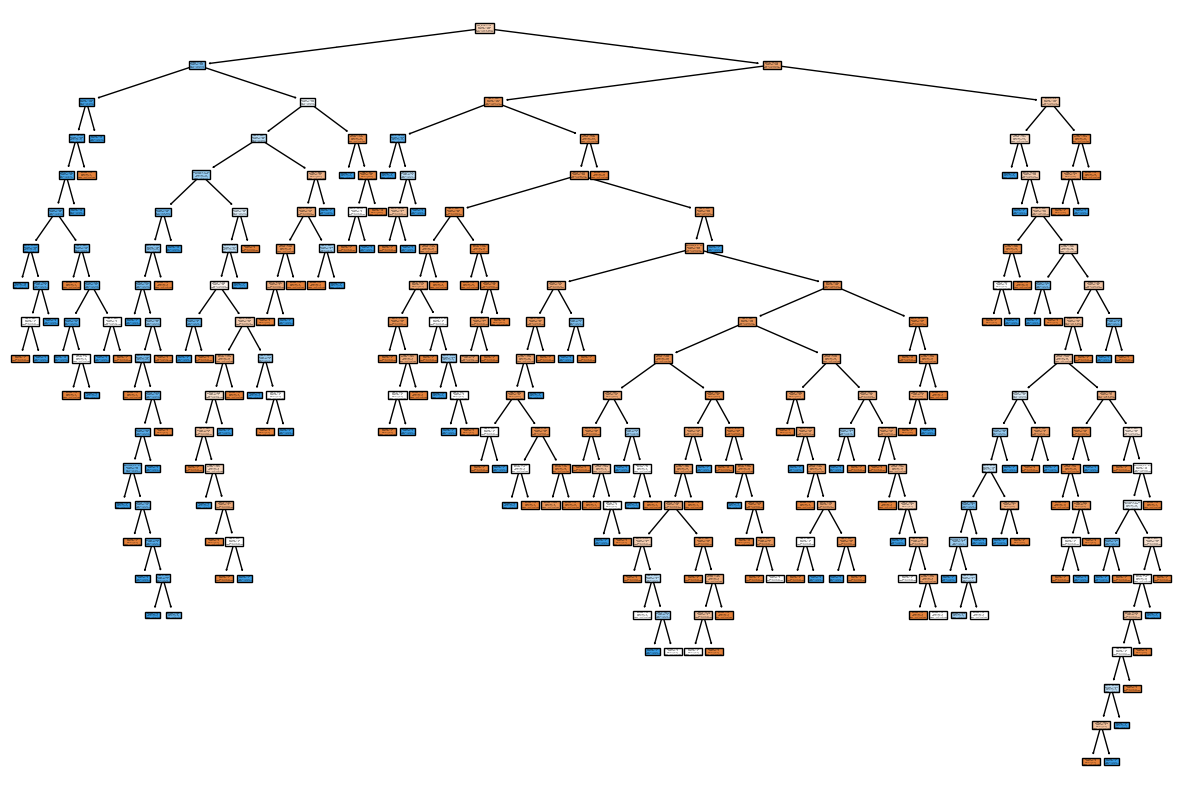

In [25]:
# Visualize decision tree
plt.figure(figsize=(15,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [26]:
tree_text = export_text(tree_model, feature_names=list(X.columns))
print(tree_text)

|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Fare <= 28.23
|   |   |   |   |--- Parch <= 0.50
|   |   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |   |--- Fare <= 17.43
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  17.43
|   |   |   |   |   |   |   |--- Fare <= 22.50
|   |   |   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Fare >  22.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  37.00
|   |   |   |   |   |   |--- Age <= 39.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  39.00
|   |   |   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |   |   |--- Age <= 56.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  

# **Analysis and Conclusion**

#### **Results and Observations**  
The decision tree generated using the ID3 algorithm highlights key factors influencing Titanic survival rates. **Gender** is the most significant determinant, with females having a much higher survival rate than males. **Passenger class** also plays a crucial role—1st and 2nd class passengers had better survival chances compared to 3rd class passengers. **Fare amount and embarkation point** also contributed, indicating socio-economic status as a factor. The tree structure is deep, reflecting complex relationships within the dataset.  

#### **Performance of the ID3 Algorithm**  
The ID3 algorithm effectively identified important features and created a tree that aligns with historical survival trends. However, **ID3 has limitations**, including sensitivity to noisy data and potential overfitting, especially with deeper trees. It performs well for categorical data but may struggle with continuous variables without proper discretization. Overall, for this dataset, **ID3 provides meaningful insights, but pruning techniques could enhance generalization.**